In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from help_funcs import *
from scipy import stats
import seaborn as sns
from scipy.io import savemat
import os

try:
    os.mkdir('RespFig5_data')
except FileExistsError:
    pass

try:
    os.mkdir('RespFig5_figs')
except FileExistsError:
    pass

try:
    os.mkdir('RespFig5B_data')
except FileExistsError:
    pass

try:
    os.mkdir('RespFig5B_figs')
except FileExistsError:
    pass

def bin_frac(spikes, tmin, tmax, dt):
    alls = [t for event in spikes for t in event]
    hist, bins = np.histogram(alls, bins=np.arange(tmin, tmax + dt, dt))
    frac = hist / len(spikes)
    return frac, bins[:-1]

data/t90_a0.07_pf0.8/results_1/


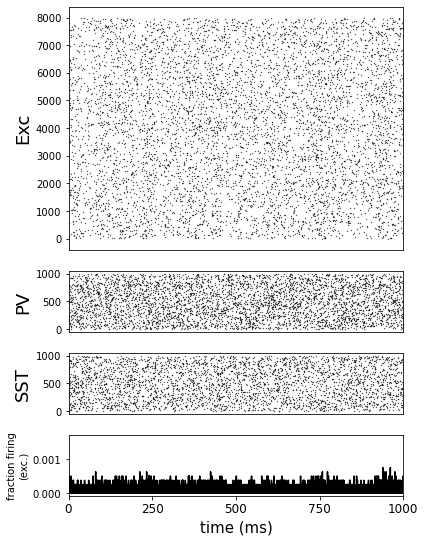

In [30]:
numseeds = 1
all_CVs = []
raster_data={}

for seed in range(1,numseeds+1):
    folder = f'data/t90_a0.07_pf0.8/results_{seed}/'
    print(folder)
    with open(folder + 'Spont_spikes.pickle', 'rb') as f:
        all_spikes = pickle.load(f)
        
    if seed==1:
#         exc_spikes_pre = all_spikes[:8000]
#         exc_spikes = exc_spikes_pre[4000:5000]
        all_exc_spike_times = []
        all_exc_neuron_indices = []
        all_pv_spike_times = []
        all_pv_neuron_indices = []
        all_sst_spike_times = []
        all_sst_neuron_indices = []
        
        frac, bins = bin_frac(all_spikes[:8000], tmin=0, tmax=5000, dt=0.1)

        # make raster
        fig, ax = plt.subplots(4,1, figsize=(6,9), gridspec_kw={'height_ratios':[4,1,1,1]})

        for i in range(8000):
            spike_times = all_spikes[i]
            neuron_indices = i*np.ones(len(all_spikes[i]))
            all_exc_spike_times.extend(spike_times)
            all_exc_neuron_indices.extend(neuron_indices)
            ax[0].plot(spike_times, neuron_indices, marker='o', linestyle='', color='black',
                    markersize=0.3,rasterized=True)
        ax[0].set_xticks([])
        ax[0].set_ylabel('Exc',fontsize=18)
        ax[0].set_xlim([4000,5000])
        raster_data['all_exc_spike_times'] = all_exc_spike_times
        raster_data['all_exc_neuron_indices'] = all_exc_neuron_indices

        for i in range(1000):
            spike_times = all_spikes[8000+i]
            neuron_indices = i*np.ones(len(all_spikes[8000+i]))
            all_pv_spike_times.extend(spike_times)
            all_pv_neuron_indices.extend(neuron_indices)
            ax[1].plot(spike_times, neuron_indices, marker='o', linestyle='', color='black',
                    markersize=0.3,rasterized=True)
        ax[1].set_xticks([])
        ax[1].set_ylabel('PV',fontsize=18)
        ax[1].set_xlim([4000,5000])
        raster_data['all_pv_spike_times'] = all_exc_spike_times
        raster_data['all_pv_neuron_indices'] = all_exc_neuron_indices

        for i in range(1000):
            spike_times = all_spikes[9000+i]
            neuron_indices = i*np.ones(len(all_spikes[9000+i]))
            all_sst_spike_times.extend(spike_times)
            all_sst_neuron_indices.extend(neuron_indices)
            ax[2].plot(all_spikes[9000 + i], i*np.ones(len(all_spikes[9000 + i])), marker='o', linestyle='', color='black',
                    markersize=0.3,rasterized=True)
        ax[2].set_xticks([])
        ax[2].set_xlim([4000,5000])
        ax[2].set_ylabel('SST',fontsize=18)
        raster_data['all_sst_spike_times'] = all_exc_spike_times
        raster_data['all_sst_neuron_indices'] = all_exc_neuron_indices

        ax[3].set_ylabel('fraction firing\n(exc.)')
        ax[3].set_xticks([4000,4250,4500,4750,5000],['0','250','500','750','1000'])
        ax[3].set_xlim([4000,5000])
        ax[3].plot(bins,frac,color='black')
        ax[3].set_xlabel('time (ms)',fontsize=15)
        ax[3].tick_params(axis='x',labelsize=12)
        raster_data['time'] = bins
        raster_data['fraction_firing'] = frac

        if not os.path.exists('spont_rasters'):
            try:
                os.makedirs('spont_rasters')
            except:
                pass

        plt.savefig(f'RespFig5_figs/seed{seed}_smallRange.png',bbox_inches='tight',dpi=200)
        plt.savefig(f'RespFig5_figs/seed{seed}_smallRange.svg',bbox_inches='tight',dpi=200)
        plt.show()
        plt.close()
        
    
    
savemat("RespFig5_data/raster_data.mat", raster_data)
# savemat("RespFig5_data/isi_hist_data.mat", isi_hist_data)
# savemat("RespFig5_data/cv_hist_data.mat", cv_hist_data)

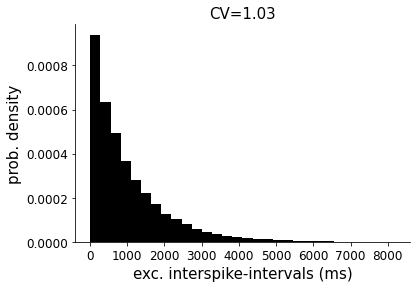

In [31]:
isi_data={}
all_ISIs = np.array([])

for i in range(8000):
    ISIs = np.diff(all_spikes[i])
    all_ISIs= np.append(all_ISIs,ISIs)
plt.hist(all_ISIs,color='black',bins=30,density=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('exc. interspike-intervals (ms)',fontsize=15)
plt.ylabel('prob. density',fontsize=15)
CV = (np.std(all_ISIs)**2)/np.mean(all_ISIs)**2
plt.title(f'CV={CV:.3}',fontsize=15)
sns.despine()
plt.savefig('RespFig5_figs/exc_spont_isis.png',bbox_inches='tight',dpi=200)
plt.savefig('RespFig5_figs/exc_spont_isis.svg',bbox_inches='tight',dpi=200)
plt.show()
plt.close()
isi_data['ISIs'] = all_ISIs

savemat("RespFig5_data/exc_isi_spont.mat", isi_data)

(1.0, 1.1)

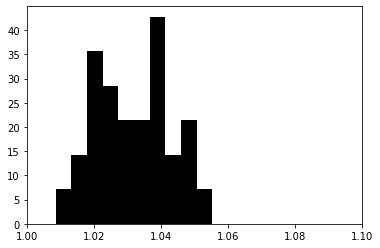

In [32]:
numseeds = 30
all_CVs = []
# raster_data={}

for seed in range(1,numseeds+1):
    folder = f'data/t90_a0.07_pf0.8/results_{seed}/'
#     print(folder)
    with open(folder + 'Spont_spikes.pickle', 'rb') as f:
        all_spikes = pickle.load(f)
        
    all_ISIs = np.array([])
    for i in range(8000):
        ISIs = np.diff(all_spikes[i])
        all_ISIs= np.append(all_ISIs,ISIs)
        
    CV = (np.std(all_ISIs)**2)/np.mean(all_ISIs)**2
    all_CVs.append(CV)
    
plt.hist(all_CVs,density=True,color='black')
plt.xlim(1,1.1)
    
# savemat("RespFig5_data/raster_data.mat", raster_data)
# savemat("RespFig5_data/isi_hist_data.mat", isi_hist_data)
# savemat("RespFig5_data/cv_hist_data.mat", cv_hist_data)

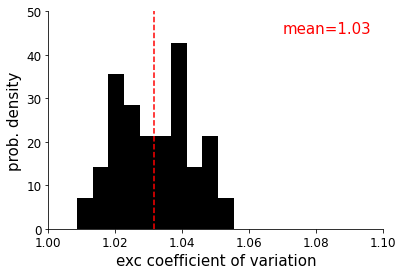

In [33]:
cv_data={}

plt.hist(all_CVs,density=True,color='black')
m=np.mean(all_CVs)
plt.vlines(m,0,50,linestyle='--',color='red')
plt.xlabel('exc coefficient of variation',fontsize=15)
plt.ylabel('prob. density',fontsize=15)
plt.text(1.07,45,f'mean={m:.3}',fontsize=15,color='red')
plt.xlim(1,1.1)
plt.ylim(0,50)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.savefig('RespFig5_figs/exc_spont_cvs.png',bbox_inches='tight',dpi=200)
plt.savefig('RespFig5_figs/exc_spont_cvs.svg',bbox_inches='tight',dpi=200)
plt.show()

cv_data['CVs'] = all_CVs
savemat("RespFig5_data/exc_cv_spont.mat", cv_data)

data/t90_a0.07_pf0.8/results_1
data/t90_a0.07_pf0.8/results_2
data/t90_a0.07_pf0.8/results_3
data/t90_a0.07_pf0.8/results_4
data/t90_a0.07_pf0.8/results_5
data/t90_a0.07_pf0.8/results_6
data/t90_a0.07_pf0.8/results_7
data/t90_a0.07_pf0.8/results_8
data/t90_a0.07_pf0.8/results_9
data/t90_a0.07_pf0.8/results_10
data/t90_a0.07_pf0.8/results_11
data/t90_a0.07_pf0.8/results_12
data/t90_a0.07_pf0.8/results_13
data/t90_a0.07_pf0.8/results_14
data/t90_a0.07_pf0.8/results_15
data/t90_a0.07_pf0.8/results_16
data/t90_a0.07_pf0.8/results_17
data/t90_a0.07_pf0.8/results_18
data/t90_a0.07_pf0.8/results_19
data/t90_a0.07_pf0.8/results_20
data/t90_a0.07_pf0.8/results_21
data/t90_a0.07_pf0.8/results_22
data/t90_a0.07_pf0.8/results_23
data/t90_a0.07_pf0.8/results_24
data/t90_a0.07_pf0.8/results_25
data/t90_a0.07_pf0.8/results_26
data/t90_a0.07_pf0.8/results_27
data/t90_a0.07_pf0.8/results_28
data/t90_a0.07_pf0.8/results_29
data/t90_a0.07_pf0.8/results_30


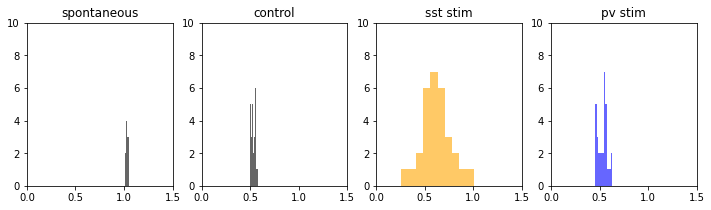

In [37]:
nrepeats = 10; skip= 0; simtime=800; delay=200; binlen = 200

control_times = []
chr_times = []
ii = skip
is_control = True
while True:
    start_time = ii * simtime + delay
    stop_time = start_time + binlen
    if stop_time > nrepeats*simtime: break
    if is_control:
        control_times.append(start_time)
    else:
        chr_times.append(start_time)   
    ii += 1
    if is_control:
        is_control = False
    else:
        is_control = True


parname='t90'
alpha=0.07
pfar=0.8
folder = 'data/%s_a%s_pf%s'%(parname,alpha,pfar)


numseeds=30
contrast=0.05
spont_CVs = []
ctrl_CVs = []
sst_chr2_CVs = []
pv_chr2_CVs = []
for seednum in range(1,numseeds+1):
    subfolder = folder + '/results_%s'%seednum
    print(subfolder)
    stimType = 'Spont'
    path = subfolder + '/%s_spikes.pickle'%(stimType)
    with open(path, 'rb') as f:
        spont_spikes = pickle.load(f)
    
    stimType = 'PV'
    path = subfolder + '/%s_%s_spikes.pickle'%(stimType,contrast)
    with open(path, 'rb') as f:
        pv_spikes = pickle.load(f)
        
    stimType = 'SST'
    path = subfolder + '/%s_%s_spikes.pickle'%(stimType,contrast)
    with open(path, 'rb') as f:
        sst_spikes = pickle.load(f)
    
    spont_isis = []
    ctrl_isis = []
    pv_chr_isis = []
    sst_chr_isis = []
    for idx in range(0,8000):
        spont_isi = np.diff(spont_spikes[idx])
        spont_isis.extend(spont_isi)
        
        for ctrl_tim in control_times:
            ctrl_spikes = pv_spikes[idx][(pv_spikes[idx] > ctrl_tim) & (pv_spikes[idx] < ctrl_tim + binlen)]
            ctrl_isi = np.diff(ctrl_spikes)
            ctrl_isis.extend(ctrl_isi)

        for chr_tim in chr_times:
            pv_chr_spikes = pv_spikes[idx][(pv_spikes[idx] > chr_tim) & (pv_spikes[idx] < chr_tim + binlen)]
            sst_chr_spikes = sst_spikes[idx][(sst_spikes[idx] > chr_tim) & (sst_spikes[idx] < chr_tim + binlen)]
            pv_chr_isi = np.diff(pv_chr_spikes)
            sst_chr_isi = np.diff(sst_chr_spikes)
            pv_chr_isis.extend(pv_chr_isi)
            sst_chr_isis.extend(sst_chr_isi)
            
#     if seednum == 1:
#         plt.hist(spont_isis,bins=50)
#         plt.xlabel('spontaneous ISI (ms)')
#         plt.ylabel('count')
#         plt.savefig('spont_ISIhist_allcells.pdf',bbox_inches='tight')
#         plt.show()
#         plt.close()

    spont_CV = (np.std(spont_isis)**2)/np.mean(spont_isis)**2
    ctrl_CV = (np.std(ctrl_isis)**2)/np.mean(ctrl_isis)**2
    pv_CV = (np.std(pv_chr_isis)**2)/np.mean(pv_chr_isis)**2
    sst_CV = (np.std(sst_chr_isis)**2)/np.mean(sst_chr_isis)**2
    spont_CVs.append(spont_CV)
    ctrl_CVs.append(ctrl_CV)
    pv_chr2_CVs.append(pv_CV)
    sst_chr2_CVs.append(sst_CV)

fig, ax = plt.subplots(1,4,figsize=(12,3))
for axi in range(4):
    ax[axi].set_xlim(0,1.5)
    ax[axi].set_ylim(0,10)

ax[0].set_title('spontaneous')
ax[0].hist(spont_CVs,alpha=0.6,color='black')
    
ax[1].set_title('control')
ax[1].hist(ctrl_CVs,alpha=0.6,color='black')

ax[2].set_title('sst stim')
ax[2].hist(sst_chr2_CVs,alpha=0.6,color='orange')

ax[3].set_title('pv stim')
ax[3].hist(pv_chr2_CVs,alpha=0.6,color='blue')

# plt.xlabel('CV')
plt.show()
plt.close()
    

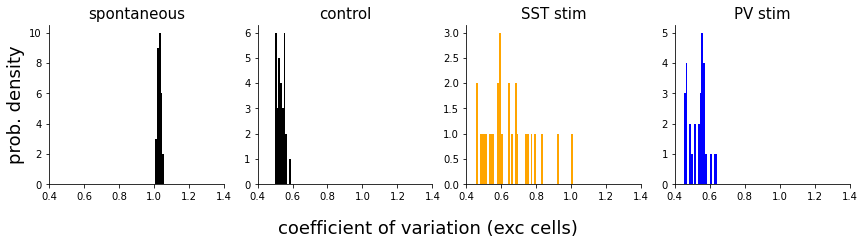

In [40]:
fig, ax = plt.subplots(1,4,figsize=(12,3))
for axi in range(4):
    ax[axi].set_xlim(0.4,1.4)
#     ax[axi].set_ylim(0,10)

binsize=0.01

ax[0].set_ylabel('prob. density',fontsize=18)
ax[0].set_title('spontaneous',fontsize=15)
ax[0].hist(spont_CVs,color='black',bins=np.arange(min(spont_CVs),max(spont_CVs)+binsize,binsize))
    
ax[1].set_title('control',fontsize=15)
ax[1].hist(ctrl_CVs,color='black',bins=np.arange(min(ctrl_CVs),max(ctrl_CVs)+binsize,binsize))

ax[2].set_title('SST stim',fontsize=15)
ax[2].hist(sst_chr2_CVs,color='orange',bins=np.arange(min(sst_chr2_CVs),max(sst_chr2_CVs)+binsize,binsize))

ax[3].set_title('PV stim',fontsize=15)
ax[3].hist(pv_chr2_CVs,color='blue',bins=np.arange(min(pv_chr2_CVs),max(pv_chr2_CVs)+binsize,binsize))

# plt.xlabel('CV')
plt.tight_layout()
sns.despine()
fig.text(0.5, -0.1, 'coefficient of variation (exc cells)', ha='center',fontsize=18)
plt.savefig('excCVhists_allConditions_horizontal.pdf',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

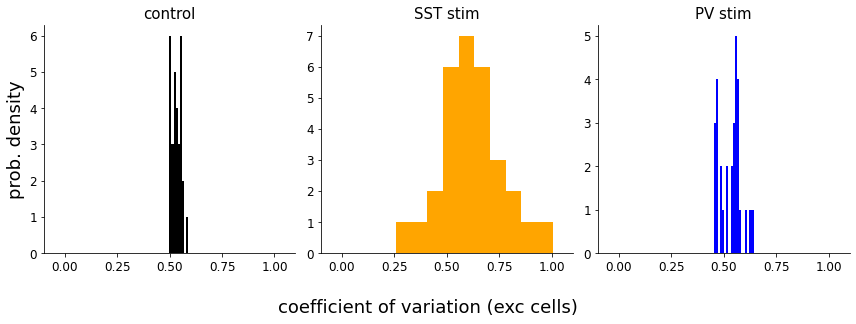

In [53]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
for axi in range(3):
    ax[axi].set_xlim(-0.1,1.1)
    ax[axi].tick_params(axis='x',labelsize=12)
    ax[axi].tick_params(axis='y',labelsize=12)
#     ax[axi].set_ylim(0,10)

binsize=0.01

ax[0].set_ylabel('prob. density',fontsize=18)
ax[0].set_title('control',fontsize=15)
ax[0].hist(ctrl_CVs,color='black',bins=np.arange(min(ctrl_CVs),max(ctrl_CVs)+binsize,binsize))

ax[1].set_title('SST stim',fontsize=15)
ax[1].hist(sst_chr2_CVs,color='orange',bins=10)

ax[2].set_title('PV stim',fontsize=15)
ax[2].hist(pv_chr2_CVs,color='blue',bins=np.arange(min(pv_chr2_CVs),max(pv_chr2_CVs)+binsize,binsize))

# plt.xlabel('CV')

plt.tight_layout()
sns.despine()
fig.text(0.5, -0.1, 'coefficient of variation (exc cells)', ha='center',fontsize=18)
plt.savefig('RespFig5B_figs/excCVhists_allConditions.png',bbox_inches='tight',dpi=200)
plt.savefig('RespFig5B_figs/excCVhists_allConditions.svg',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

cv_data={}

cv_data['ctrl_CVs'] = ctrl_CVs
cv_data['sst_CVs'] = sst_chr2_CVs
cv_data['pv_CVs'] = pv_chr2_CVs
savemat("RespFig5B_data/exc_cv_allConditions.mat", cv_data)

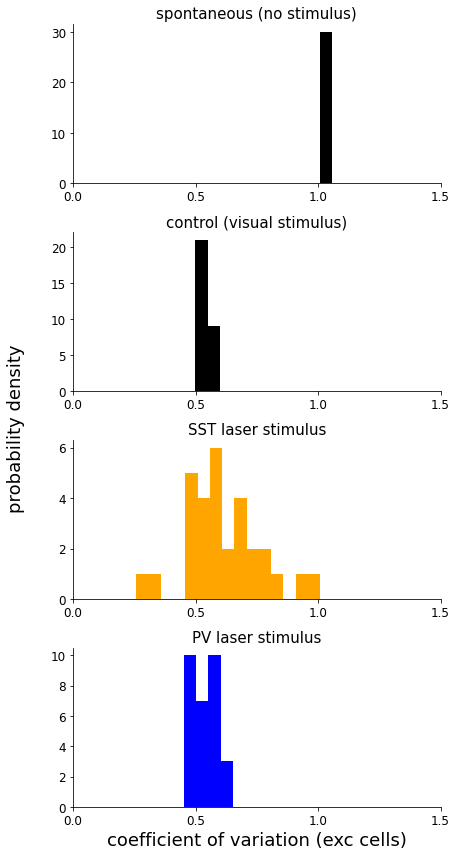

In [195]:
fig, ax = plt.subplots(4,figsize=(6,12))
for axi in range(4):
    ax[axi].set_xlim(0,1.5)
    ax[axi].set_xticks([0,0.5,1.0,1.5])
    ax[axi].tick_params(axis='x',labelsize=12)
    ax[axi].tick_params(axis='y',labelsize=12)
#     ax[axi].set_ylabel('prob. density',fontsize=18)
#     ax[axi].set_ylim(0,10)

fig.text(-0.05, 0.5, 'probability density', va='center',fontsize=18, rotation='vertical')

binsize=0.05

ax[0].set_title('spontaneous (no stimulus)',fontsize=15)
ax[0].hist(spont_CVs,color='black',bins=np.arange(min(spont_CVs),max(spont_CVs)+binsize,binsize))
    
ax[1].set_title('control (visual stimulus)',fontsize=15)
ax[1].hist(ctrl_CVs,color='black',bins=np.arange(min(ctrl_CVs),max(ctrl_CVs)+binsize,binsize))

ax[2].set_title('SST laser stimulus',fontsize=15)
ax[2].hist(sst_chr2_CVs,color='orange',bins=np.arange(min(sst_chr2_CVs),max(sst_chr2_CVs)+binsize,binsize))

ax[3].set_title('PV laser stimulus',fontsize=15)
ax[3].hist(pv_chr2_CVs,color='blue',bins=np.arange(min(pv_chr2_CVs),max(pv_chr2_CVs)+binsize,binsize))
ax[3].set_xlabel('coefficient of variation (exc cells)',fontsize=18)

# plt.xlabel('CV')
plt.tight_layout()
sns.despine()
# fig.text(0.5, -0.1, 'coefficient of variation (exc cells)', ha='center',fontsize=18)
plt.savefig('CVhists_allConditions_vertical.png',bbox_inches='tight',dpi=200)
plt.savefig('CVhists_allConditions_vertical.svg',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

cv_hist_data={}
cv_hist_data['spont_CVs'] = spont_CVs
cv_hist_data['ctrl_CVs'] = ctrl_CVs
cv_hist_data['sst_chr2_CVs'] = sst_chr2_CVs
cv_hist_data['pv_chr2_CVs'] = pv_chr2_CVs
savemat("RespFig5_data/cv_hist_data.mat", cv_hist_data)

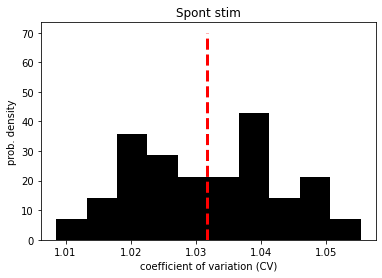

In [116]:
parname='t90'
alpha=0.07
pfar=0.8
folder = 'data/%s_a%s_pf%s'%(parname,alpha,pfar)
# print(folder)
numseeds=30
CVs=[]

for seednum in range(1,numseeds+1):
# seednum=1
    subfolder = folder + '/results_%s'%seednum
#     print(subfolder)
    stimType='Spont'
    contrast=0.0
    if stimType=='Spont':
        path = subfolder + '/%s_spikes.pickle'%(stimType)
    else:
        path = subfolder + '/%s_%s_spikes.pickle'%(stimType,contrast)
#     print(path)

    with open(path, 'rb') as f:
        all_spikes = pickle.load(f)

    all_ISIs = np.array([])

    for i in range(8000):
        ISIs = np.diff(all_spikes[i])
        all_ISIs= np.append(all_ISIs,ISIs)

    CV = (np.std(all_ISIs)**2)/np.mean(all_ISIs)**2
#     # CV = np.std(all_ISIs)/np.mean(all_ISIs)
#     print(CV)
    CVs.append(CV)
    
meanCV = np.mean(CVs)
plt.title('%s stim'%stimType)
plt.xlabel('coefficient of variation (CV)')
plt.hist(CVs,color='black',density=True)
plt.vlines(meanCV,0,70,linestyle='--',linewidth=3,color='red')
plt.ylabel('prob. density')
plt.show()

In [62]:
stats.ttest_1samp(CVs, popmean=1., alternative='greater')

Ttest_1sampResult(statistic=6.126207904343874, pvalue=8.682101435200248e-05)

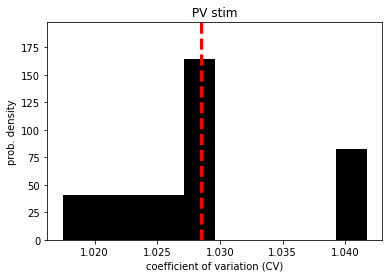

Ttest_1sampResult(statistic=11.652381361193548, pvalue=4.943453350455812e-07)


In [74]:
parname='t90'
alpha=0.07
pfar=0.8
folder = 'data/%s_a%s_pf%s'%(parname,alpha,pfar)
# print(folder)
numseeds=10
CVs=[]

for seednum in range(1,numseeds+1):
# seednum=1
    subfolder = folder + '/results_%s'%seednum
#     print(subfolder)
    stimType='PV'
    contrast=0.05
    if stimType=='Spont':
        path = subfolder + '/%s_spikes.pickle'%(stimType)
    else:
        path = subfolder + '/%s_%s_spikes.pickle'%(stimType,contrast)
#     print(path)

    with open(path, 'rb') as f:
        all_spikes = pickle.load(f)

    all_ISIs = np.array([])

    for i in range(8000):
        ISIs = np.diff(all_spikes[i])
        all_ISIs= np.append(all_ISIs,ISIs)

    CV = (np.std(all_ISIs)**2)/np.mean(all_ISIs)**2
#     # CV = np.std(all_ISIs)/np.mean(all_ISIs)
#     print(CV)
    CVs.append(CV)
    
meanCV = np.mean(CVs)
plt.title('%s stim'%stimType)
plt.xlabel('coefficient of variation (CV)')
hist = plt.hist(CVs,color='black',density=True)
# print(hist[0])
prob_densities = hist[0]
top = max(prob_densities)
plt.vlines(meanCV,0,1.2*top,linestyle='--',linewidth=3,color='red')
plt.ylim(0,1.2*top)
plt.ylabel('prob. density')
plt.show()

res = stats.ttest_1samp(CVs, popmean=1., alternative='greater')
print(res)

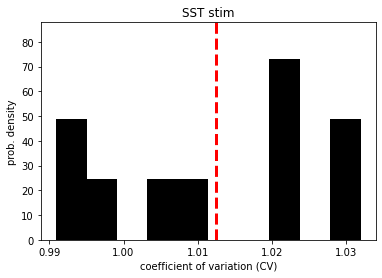

Ttest_1sampResult(statistic=2.669016639529649, pvalue=0.012831887951060742)


In [75]:
parname='t90'
alpha=0.07
pfar=0.8
folder = 'data/%s_a%s_pf%s'%(parname,alpha,pfar)
# print(folder)
numseeds=10
CVs=[]

for seednum in range(1,numseeds+1):
# seednum=1
    subfolder = folder + '/results_%s'%seednum
#     print(subfolder)
    stimType='SST'
    contrast=0.05
    if stimType=='Spont':
        path = subfolder + '/%s_spikes.pickle'%(stimType)
    else:
        path = subfolder + '/%s_%s_spikes.pickle'%(stimType,contrast)
#     print(path)

    with open(path, 'rb') as f:
        all_spikes = pickle.load(f)

    all_ISIs = np.array([])

    for i in range(8000):
        ISIs = np.diff(all_spikes[i])
        all_ISIs= np.append(all_ISIs,ISIs)

    CV = (np.std(all_ISIs)**2)/np.mean(all_ISIs)**2
#     # CV = np.std(all_ISIs)/np.mean(all_ISIs)
#     print(CV)
    CVs.append(CV)
    
meanCV = np.mean(CVs)
plt.title('%s stim'%stimType)
plt.xlabel('coefficient of variation (CV)')
hist = plt.hist(CVs,color='black',density=True)
# print(hist[0])
prob_densities = hist[0]
top = max(prob_densities)
plt.vlines(meanCV,0,1.2*top,linestyle='--',linewidth=3,color='red')
plt.ylim(0,1.2*top)
plt.ylabel('prob. density')
plt.show()

res = stats.ttest_1samp(CVs, popmean=1., alternative='greater')
print(res)